In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

In [3]:
def model_train(model, x, y):
    epoch_max = 20000
    arr_epoch,arr_loss=[],[]
    converged = False
    epoch = 0
    while not converged:
        epoch += 1
        prediction = model(x)  
        loss = loss_func(prediction, y)
        optimizer.zero_grad() #clear gradients for next epoch
        loss.backward() #compute gradients using back propogation
        optimizer.step() 
        arr_epoch.append(epoch)
        arr_loss.append(loss.detach().numpy())
        
        if epoch % 500 == 0: 
            print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == epoch_max:
                print("Max Epoch Reached")
                converged = True

        elif (epoch > 5) and  (arr_loss[-1] < 0.001):
            if abs(arr_loss[-3] - arr_loss[-2]) < 1.0e-05 and abs(arr_loss[-2] - arr_loss[-1]) < 1.0e-05:
                print("Convergence reached for loss:",arr_loss[-1])
                converged = True
                
    return arr_epoch, arr_loss, prediction

Function (sin(5* pi* x))/(5* pi* x)

In [4]:
x = np.expand_dims(np.arange(-1.5,1.5,0.01),1)
y = np.sinc(5*x)
print(x.shape)
print(y.shape)

(300, 1)
(300, 1)


<ipython-input-6-baee9c8c3ec3>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


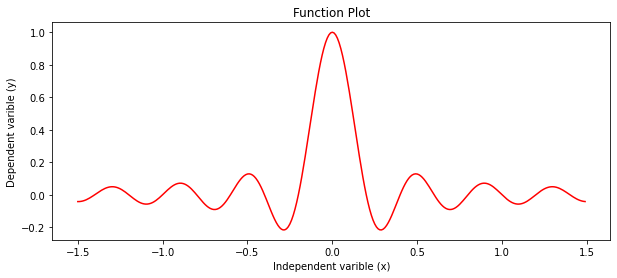

In [6]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")
plt.title('Function Plot')
plt.xlabel('Independent varible (x)')
plt.ylabel('Dependent varible (y)')
plt.show()

Model 1

In [7]:
class Model1(nn.Module):
    def __init__(self,):
        super(Model1, self).__init__()
        self.linear1 = nn.Linear(1, 5)
        self.linear2 = nn.Linear(5, 10)
        self.linear3 = nn.Linear(10, 10)
        self.linear4 = nn.Linear(10, 10)
        self.linear5 = nn.Linear(10, 10)
        self.linear6 = nn.Linear(10, 10)
        self.linear7 = nn.Linear(10, 5)
        self.predict = nn.Linear(5, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))
        x = nn.functional.leaky_relu(self.linear5(x))
        x = nn.functional.leaky_relu(self.linear6(x))
        x = nn.functional.leaky_relu(self.linear7(x))

        x = self.predict(x)
        return x
 
model_1 = Model1()

In [8]:
optimizer = torch.optim.RMSprop(model_1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss
pytorch_total_params = sum(p.numel() for p in model_1.parameters())
print(pytorch_total_params)
m1_arr_epoch, m1_arr_loss, m1_prediction = model_train(model_1, x, y)

571
epoch: 500, loss = 0.0033
epoch: 1000, loss = 0.0029
epoch: 1500, loss = 0.0025
epoch: 2000, loss = 0.0024
epoch: 2500, loss = 0.0023
epoch: 3000, loss = 0.0023
epoch: 3500, loss = 0.0021
epoch: 4000, loss = 0.0020
epoch: 4500, loss = 0.0020
epoch: 5000, loss = 0.0018
epoch: 5500, loss = 0.0016
epoch: 6000, loss = 0.0014
epoch: 6500, loss = 0.0014
epoch: 7000, loss = 0.0014
epoch: 7500, loss = 0.0014
epoch: 8000, loss = 0.0015
epoch: 8500, loss = 0.0013
epoch: 9000, loss = 0.0014
epoch: 9500, loss = 0.0014
epoch: 10000, loss = 0.0014
epoch: 10500, loss = 0.0013
epoch: 11000, loss = 0.0015
epoch: 11500, loss = 0.0013
epoch: 12000, loss = 0.0015
epoch: 12500, loss = 0.0013
epoch: 13000, loss = 0.0016
epoch: 13500, loss = 0.0015
epoch: 14000, loss = 0.0013
epoch: 14500, loss = 0.0013
epoch: 15000, loss = 0.0014
epoch: 15500, loss = 0.0013
epoch: 16000, loss = 0.0014
epoch: 16500, loss = 0.0012
epoch: 17000, loss = 0.0013
epoch: 17500, loss = 0.0013
epoch: 18000, loss = 0.0013
epoch: 1

Model 2

In [12]:
class Model2(nn.Module):
    def __init__(self,):
        super(Model2, self).__init__()
        self.linear1 = nn.Linear(1, 10)
        self.linear2 = nn.Linear(10, 18)
        self.linear3 = nn.Linear(18, 15)
        self.linear4 = nn.Linear(15, 4)
        self.predict = nn.Linear(4, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))

        x = self.predict(x)
        return x
 
model_2 = Model2()

In [14]:
optimizer = torch.optim.RMSprop(model_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 
pytorch_total_params = sum(p.numel() for p in model_2.parameters())
print(pytorch_total_params)
m2_arr_epoch, m2_arr_loss, m2_prediction = model_train(model_2, x, y)

572
epoch: 500, loss = 0.0058
epoch: 1000, loss = 0.0044
epoch: 1500, loss = 0.0031
epoch: 2000, loss = 0.0026
epoch: 2500, loss = 0.0025
epoch: 3000, loss = 0.0025
epoch: 3500, loss = 0.0022
epoch: 4000, loss = 0.0020
epoch: 4500, loss = 0.0023
epoch: 5000, loss = 0.0023
epoch: 5500, loss = 0.0018
epoch: 6000, loss = 0.0023
epoch: 6500, loss = 0.0020
epoch: 7000, loss = 0.0018
epoch: 7500, loss = 0.0020
epoch: 8000, loss = 0.0019
epoch: 8500, loss = 0.0019
epoch: 9000, loss = 0.0019
epoch: 9500, loss = 0.0022
epoch: 10000, loss = 0.0020
epoch: 10500, loss = 0.0017
epoch: 11000, loss = 0.0022
epoch: 11500, loss = 0.0017
epoch: 12000, loss = 0.0021
epoch: 12500, loss = 0.0017
epoch: 13000, loss = 0.0020
epoch: 13500, loss = 0.0017
epoch: 14000, loss = 0.0019
epoch: 14500, loss = 0.0016
epoch: 15000, loss = 0.0022
epoch: 15500, loss = 0.0016
epoch: 16000, loss = 0.0017
epoch: 16500, loss = 0.0018
epoch: 17000, loss = 0.0017
epoch: 17500, loss = 0.0017
epoch: 18000, loss = 0.0018
epoch: 1

Model 3

In [15]:
class Model3(nn.Module):
    def __init__(self,):
        super(Model3, self).__init__()
        self.linear1 = nn.Linear(1, 190)
        self.predict = nn.Linear(190, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))

        x = self.predict(x)
        return x
 
model_3 = Model3()

In [16]:
optimizer = torch.optim.RMSprop(model_3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_3.parameters())
print(pytorch_total_params)
m3_arr_epoch, m3_arr_loss, m3_prediction = model_train(model_3, x, y)

571
epoch: 500, loss = 0.0298
epoch: 1000, loss = 0.0215
epoch: 1500, loss = 0.0167
epoch: 2000, loss = 0.0137
epoch: 2500, loss = 0.0116
epoch: 3000, loss = 0.0101
epoch: 3500, loss = 0.0090
epoch: 4000, loss = 0.0083
epoch: 4500, loss = 0.0077
epoch: 5000, loss = 0.0073
epoch: 5500, loss = 0.0069
epoch: 6000, loss = 0.0067
epoch: 6500, loss = 0.0064
epoch: 7000, loss = 0.0062
epoch: 7500, loss = 0.0061
epoch: 8000, loss = 0.0060
epoch: 8500, loss = 0.0059
epoch: 9000, loss = 0.0058
epoch: 9500, loss = 0.0057
epoch: 10000, loss = 0.0056
epoch: 10500, loss = 0.0055
epoch: 11000, loss = 0.0055
epoch: 11500, loss = 0.0054
epoch: 12000, loss = 0.0053
epoch: 12500, loss = 0.0053
epoch: 13000, loss = 0.0052
epoch: 13500, loss = 0.0052
epoch: 14000, loss = 0.0051
epoch: 14500, loss = 0.0051
epoch: 15000, loss = 0.0050
epoch: 15500, loss = 0.0049
epoch: 16000, loss = 0.0050
epoch: 16500, loss = 0.0049
epoch: 17000, loss = 0.0049
epoch: 17500, loss = 0.0048
epoch: 18000, loss = 0.0048
epoch: 1

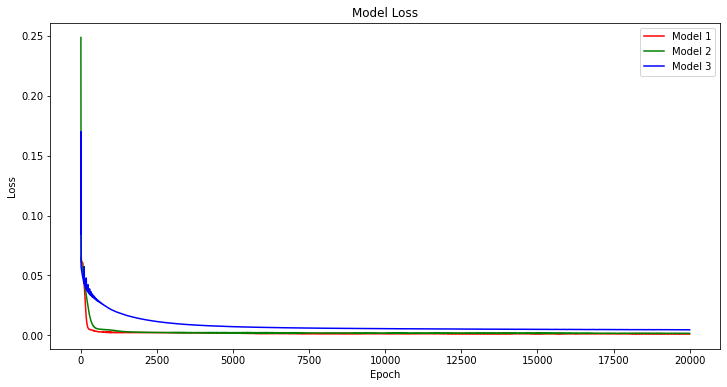

In [17]:
plt.figure(figsize=(12,6))
plt.plot(m1_arr_epoch, m1_arr_loss, color = "r")
plt.plot(m2_arr_epoch, m2_arr_loss, color = "g")
plt.plot(m3_arr_epoch, m3_arr_loss, color = "b")
plt.title('Model Loss')
plt.legend(['Model 1', 'Model 2','Model 3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

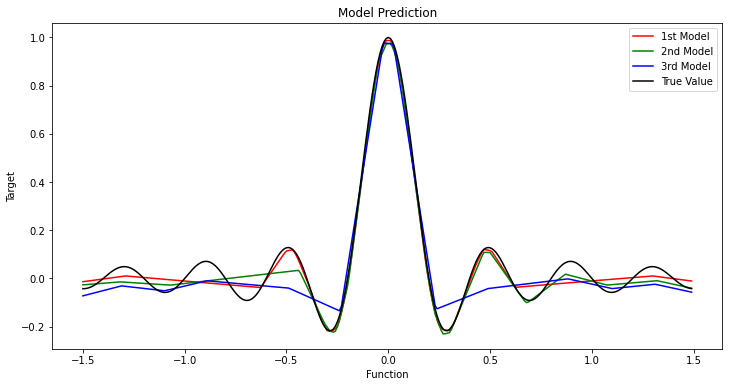

In [18]:
plt.figure(figsize=(12,6))
plt.plot(x, m1_prediction.data, color="r", label = '1st Model')
plt.plot(x, m2_prediction.data, color="g", label = '2nd Model')
plt.plot(x, m3_prediction.data, color="b", label = '3rd Model')
plt.plot(x, y, color="black", label = 'True Value')
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()

Function sgn(sin(5* pi * x))

In [20]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
y = np.sign(np.sin(5*np.pi*x))
print(x.shape)
print(y.shape)

(300, 1)
(300, 1)


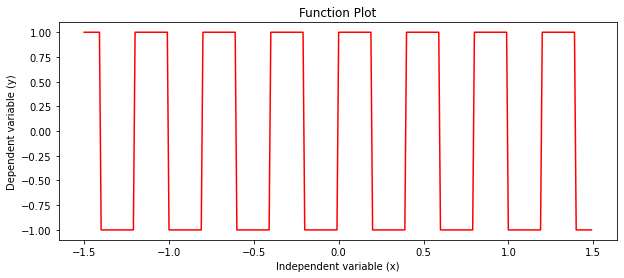

In [21]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")

plt.title('Function Plot')
plt.xlabel('Independent variable (x)')
plt.ylabel('Dependent variable (y)')
plt.show()

Model 1

In [24]:
model_sign_1 = Model1()
optimizer = torch.optim.Adam(model_sign_1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss
pytorch_total_params = sum(p.numel() for p in model_sign_1.parameters())
print(pytorch_total_params)
m1_arr_epoch, m1_arr_loss, m1_prediction = model_train(model_sign_1, x, y)

571
epoch: 500, loss = 1.0000
epoch: 1000, loss = 0.9351
epoch: 1500, loss = 0.7621
epoch: 2000, loss = 0.7493
epoch: 2500, loss = 0.7416
epoch: 3000, loss = 0.7374
epoch: 3500, loss = 0.7371
epoch: 4000, loss = 0.7346
epoch: 4500, loss = 0.7457
epoch: 5000, loss = 0.7420
epoch: 5500, loss = 0.7886
epoch: 6000, loss = 0.7396
epoch: 6500, loss = 0.7318
epoch: 7000, loss = 0.7351
epoch: 7500, loss = 0.7353
epoch: 8000, loss = 0.7359
epoch: 8500, loss = 0.7371
epoch: 9000, loss = 0.7609
epoch: 9500, loss = 0.7507
epoch: 10000, loss = 0.7803
epoch: 10500, loss = 0.7415
epoch: 11000, loss = 0.8816
epoch: 11500, loss = 0.7642
epoch: 12000, loss = 0.7321
epoch: 12500, loss = 0.6784
epoch: 13000, loss = 0.6691
epoch: 13500, loss = 0.6896
epoch: 14000, loss = 0.6827
epoch: 14500, loss = 0.6786
epoch: 15000, loss = 0.6756
epoch: 15500, loss = 0.6744
epoch: 16000, loss = 0.6729
epoch: 16500, loss = 0.6695
epoch: 17000, loss = 0.6672
epoch: 17500, loss = 0.6659
epoch: 18000, loss = 0.6636
epoch: 1

Model 2

In [23]:
model_sign_2 = Model2()
optimizer = torch.optim.Adam(model_sign_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 
pytorch_total_params = sum(p.numel() for p in model_sign_2.parameters())
print(pytorch_total_params)
m2_arr_epoch, m2_arr_loss, m2_prediction = model_train(model_sign_2, x, y)

572
epoch: 500, loss = 0.8084
epoch: 1000, loss = 0.5253
epoch: 1500, loss = 0.4842
epoch: 2000, loss = 0.3947
epoch: 2500, loss = 0.3392
epoch: 3000, loss = 0.3295
epoch: 3500, loss = 0.3231
epoch: 4000, loss = 0.3196
epoch: 4500, loss = 0.3179
epoch: 5000, loss = 0.3172
epoch: 5500, loss = 0.3168
epoch: 6000, loss = 0.3157
epoch: 6500, loss = 0.3153
epoch: 7000, loss = 0.3136
epoch: 7500, loss = 0.3128
epoch: 8000, loss = 0.3135
epoch: 8500, loss = 0.3121
epoch: 9000, loss = 0.3124
epoch: 9500, loss = 0.3112
epoch: 10000, loss = 0.3119
epoch: 10500, loss = 0.3106
epoch: 11000, loss = 0.3103
epoch: 11500, loss = 0.3118
epoch: 12000, loss = 0.3110
epoch: 12500, loss = 0.3103
epoch: 13000, loss = 0.3091
epoch: 13500, loss = 0.3094
epoch: 14000, loss = 0.3085
epoch: 14500, loss = 0.3071
epoch: 15000, loss = 0.3080
epoch: 15500, loss = 0.3062
epoch: 16000, loss = 0.3073
epoch: 16500, loss = 0.3064
epoch: 17000, loss = 0.3064
epoch: 17500, loss = 0.3058
epoch: 18000, loss = 0.3134
epoch: 1

Model 3

In [25]:
model_sign_3 = Model3()
optimizer = torch.optim.Adam(model_sign_3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_sign_3.parameters())
print(pytorch_total_params)
m3_arr_epoch, m3_arr_loss, m3_prediction = model_train(model_sign_3, x, y)

571
epoch: 500, loss = 0.9384
epoch: 1000, loss = 0.7899
epoch: 1500, loss = 0.5922
epoch: 2000, loss = 0.4435
epoch: 2500, loss = 0.3565
epoch: 3000, loss = 0.3061
epoch: 3500, loss = 0.2754
epoch: 4000, loss = 0.2559
epoch: 4500, loss = 0.2429
epoch: 5000, loss = 0.2329
epoch: 5500, loss = 0.2252
epoch: 6000, loss = 0.2199
epoch: 6500, loss = 0.2158
epoch: 7000, loss = 0.2122
epoch: 7500, loss = 0.2096
epoch: 8000, loss = 0.2075
epoch: 8500, loss = 0.2057
epoch: 9000, loss = 0.2042
epoch: 9500, loss = 0.2028
epoch: 10000, loss = 0.2015
epoch: 10500, loss = 0.2003
epoch: 11000, loss = 0.1993
epoch: 11500, loss = 0.1984
epoch: 12000, loss = 0.1975
epoch: 12500, loss = 0.1967
epoch: 13000, loss = 0.1958
epoch: 13500, loss = 0.1953
epoch: 14000, loss = 0.1944
epoch: 14500, loss = 0.1938
epoch: 15000, loss = 0.1932
epoch: 15500, loss = 0.1927
epoch: 16000, loss = 0.1921
epoch: 16500, loss = 0.1915
epoch: 17000, loss = 0.1910
epoch: 17500, loss = 0.1905
epoch: 18000, loss = 0.1877
epoch: 1

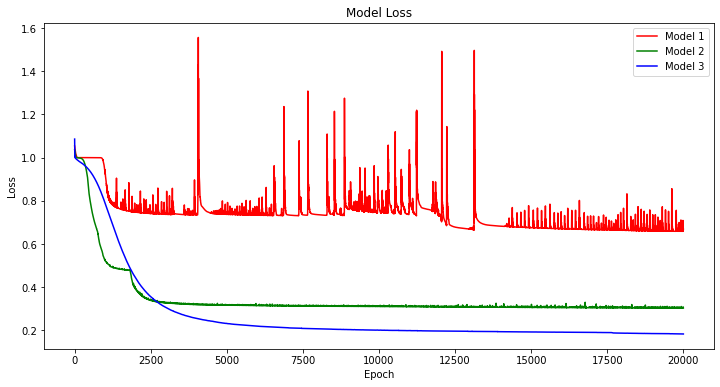

In [26]:
plt.figure(figsize=(12,6))
plt.plot(m1_arr_epoch, m1_arr_loss, color = "r")
plt.plot(m2_arr_epoch, m2_arr_loss, color = "g")
plt.plot(m3_arr_epoch, m3_arr_loss, color = "b")
plt.title('Model Loss')
plt.legend(['Model 1', 'Model 2','Model 3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

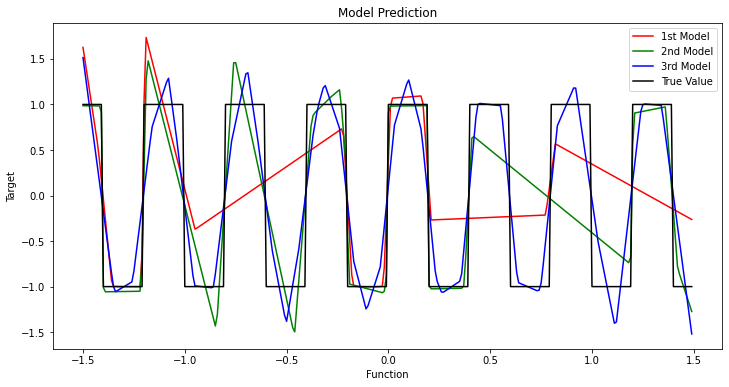

In [27]:
plt.figure(figsize=(12,6))
plt.plot(x, m1_prediction.data, color="r", label = '1st Model')
plt.plot(x, m2_prediction.data, color="g", label = '2nd Model')
plt.plot(x, m3_prediction.data, color="b", label = '3rd Model')
plt.plot(x, y, color="black", label = 'True Value')
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()